![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# MACHINE LEARNING IN PRACTICE: END MODULE ASSIGNMENT 

The objective of this assignment is to help with the development of machine learning-based models for predicting atmospheric emissions (and pollution) from data gathered by various borough and county environment monitoring units by carrying out several tasks using the Anaconda/Scikit-Learn Python ML framework and its components.

# SECTION 2: EMISSIONS MODELLING AND INTERPRETATIONS

This section comprises the algorithms we have selected and the interpretations that arise from modelling these algorithms.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 2.1: Models choices and evaluations metrics considerations

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor

import importlib
from helpers import utilities as utils

# Reload the module to reflect changes without restarting the kernel
importlib.reload(utils)

<module 'helpers.utilities' from '/Users/eyapene/Liverpool/ML in Practice/Jupyter/EMA/EmissionsML/helpers/utilities.py'>

In [4]:
X, y = utils.load_data('./preprocessed_data/final_dataset.csv', 
                       ['co2_avg', 'pm10_avg', 'pm25_avg', 'no2_avg']) 

In [5]:
X.head()

,road_classification,vkm_motorcycle,vkm_taxi,vkm_petrol_car,vkm_diesel_car,vkm_electric_car,vkm_petrol_phv,vkm_diesel_phv,vkm_electric_phv,vkm_petrol_lgv,...,vkm_hgvs_rigid_3_axles,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
0,0,2289.0,307.0,111810.0,77272.0,662.0,1881.0,1547.0,26.0,195.0,...,736.0,1451.0,531.0,2759.0,3659.0,0.0,327.0,0,1,0
1,0,2921.0,430.0,131006.0,90538.0,776.0,14550.0,11968.0,203.0,305.0,...,344.0,687.0,258.0,1289.0,1718.0,0.0,1160.0,0,1,0
2,0,1568.0,180.0,68868.0,47595.0,408.0,808.0,665.0,11.0,224.0,...,275.0,551.0,192.0,1042.0,1377.0,0.0,7746.0,0,1,0
3,0,48019.0,3777.0,1963886.0,1357242.0,11630.0,106644.0,87722.0,1488.0,8118.0,...,12679.0,25359.0,9172.0,48019.0,63396.0,0.0,97388.0,0,1,0
4,0,429.0,82.0,20315.0,14040.0,120.0,522.0,429.0,7.0,45.0,...,94.0,185.0,67.0,352.0,465.0,0.0,446.0,0,1,0


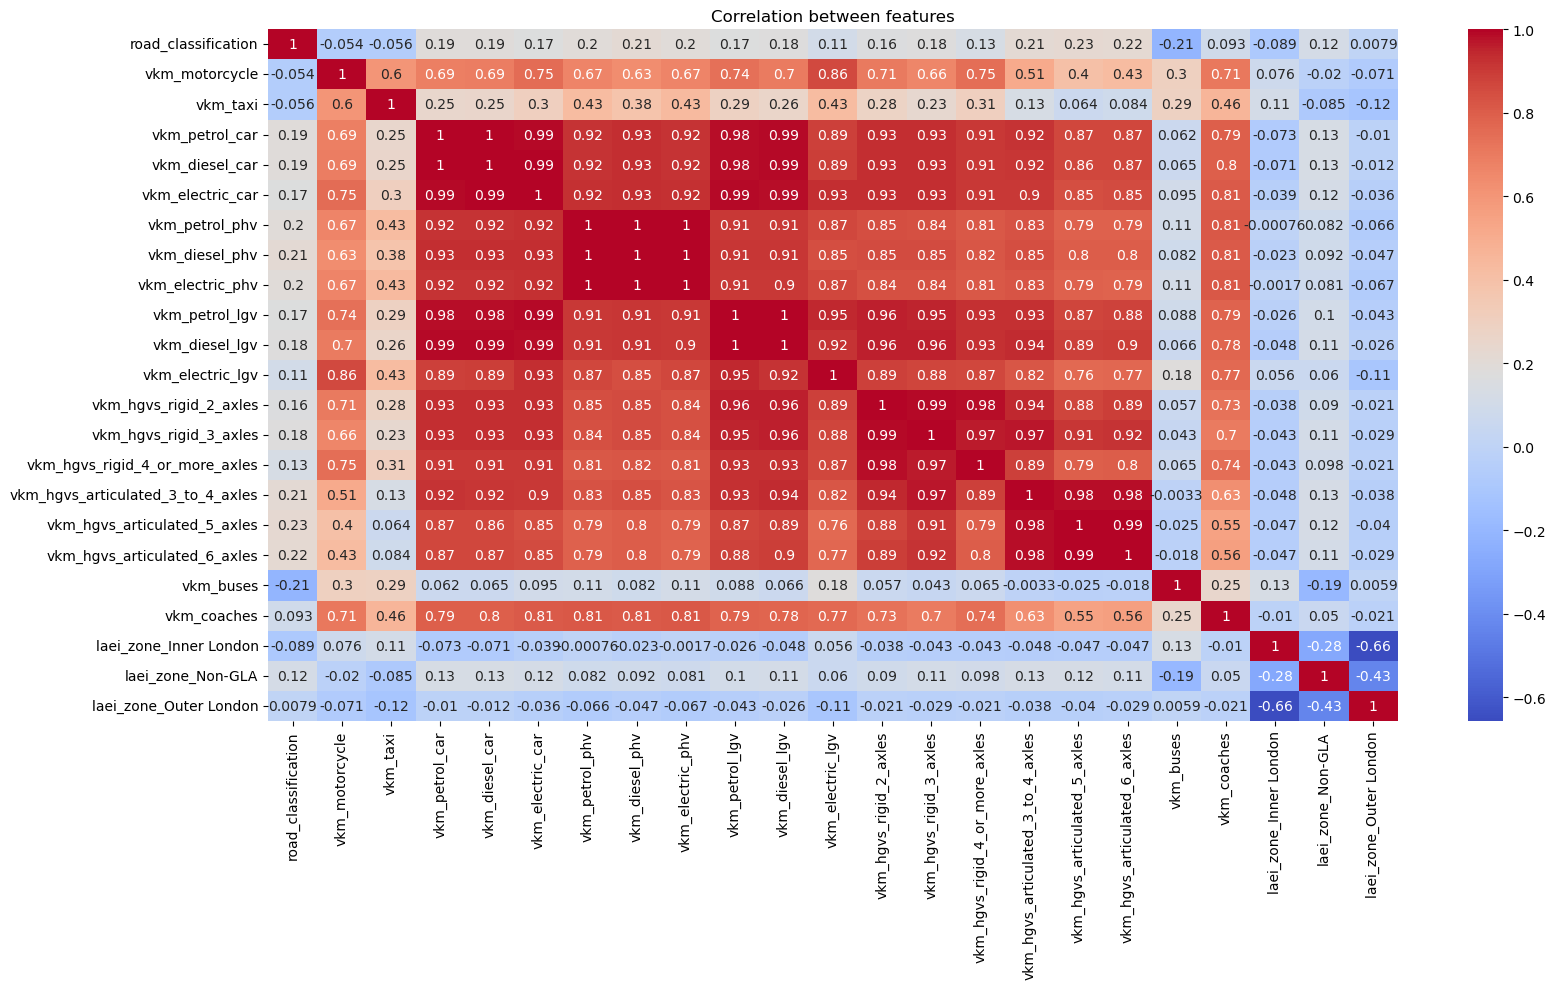

In [6]:
# Correlation overview of the features selected
utils.plot_correlation_heatmap(X)

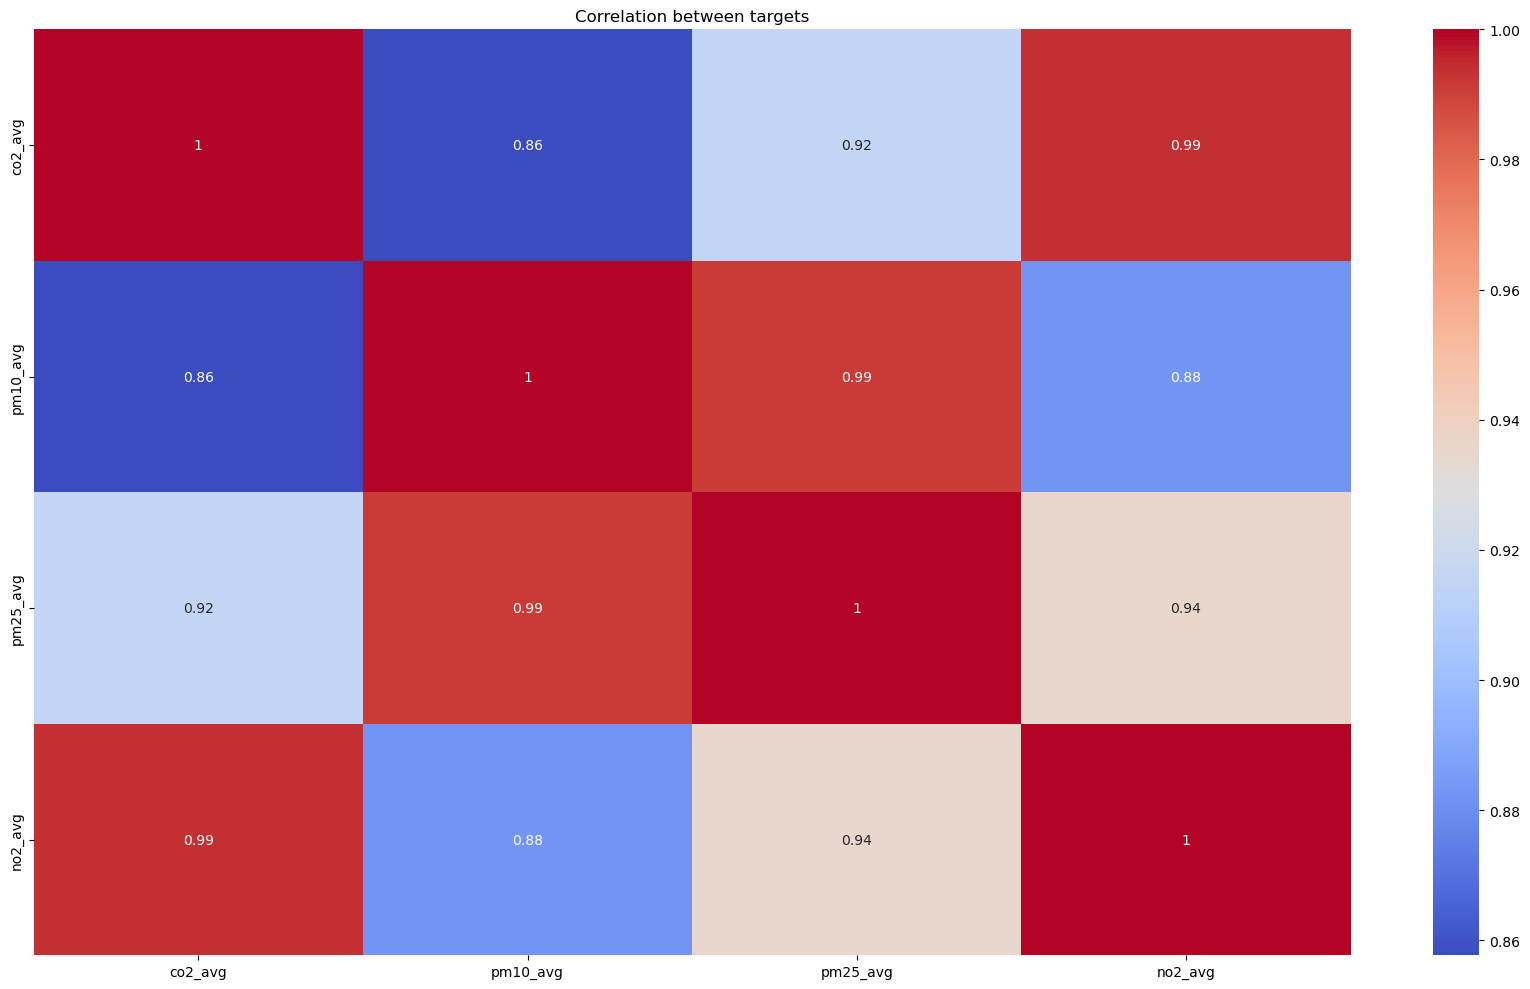

In [7]:
# Correlation overview of the targets
utils.plot_correlation_heatmap(y, title='Correlation between targets')

**Algorithm considerations**

Features seem to be highly correlated, raising multicollinearity.
As we do not want to suppress any of these characteristics for the purposes of interpretability and impact on emissions, we will use the following algorithms, which are well suited to multicollinearity situations:
- Random Forest
- XGBoost
- Ridge Regression
- Multi-Layer Perceptron (MLP) Regressor


As the targets appear to be highly correlated, it suggests that the Multi-Output Regression technique may be better.

**Evaulations metrics considerations**

As we are going to use Regression Supervised Machines Learning, we are going to use the following metrics to evaluate the algorithms performace:

**Mean Absolute Error** (MAE) is the average absolute difference between actual and predicted values :

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**R Squared** (R^2) is the coefficient of determination. It represents the proportion of the variance in y that is predictable from the independent variables (X).

$$1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

**Mean Squared Error** (MSE) is the mean square error. It penalises larger errors more heavily than MAE since it squares the errors.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean error squared. It is the square root of MSE and gives an error measure in the same units as the data.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


- **MAE** is the average error.
- **R^2** quantifies how well the regression model fits the observed data
- **MSE** _penalise_ larger errors, which tends to be useful in the real world.
- **RMSE** can be interpreted in the same units as ‘y’.


**R^2** value that tend 1 means the model explains all the variability in the dependent variable.
For the other metrics, lower values indicate better performance and mean better predictions.

In [98]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale training data and store the scaler
X_train_scaled, _, scaler_X, _ = utils.scale_data(X_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
X_test_scaled, _, _, _ = utils.scale_data(X_test, scaler_X=scaler_X, fit_scaler=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 2.2: Models implementations and evaluations

<hr style="border: 2px solid blue;">

### Step 2.2.1: XGBoost MultiOutputRegressor Regressor

In [13]:
# implement multi-output regression using xgboost regressor

# train the model
xgb = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', n_estimators=1000, 
                                        learning_rate=0.1, max_depth=6, random_state=42))
xgb.fit(X_train_scaled, y_train)

# predict the target values
y_pred = xgb.predict(X_test_scaled)



=== XGBoost Regressor Evaluation Metrics ===


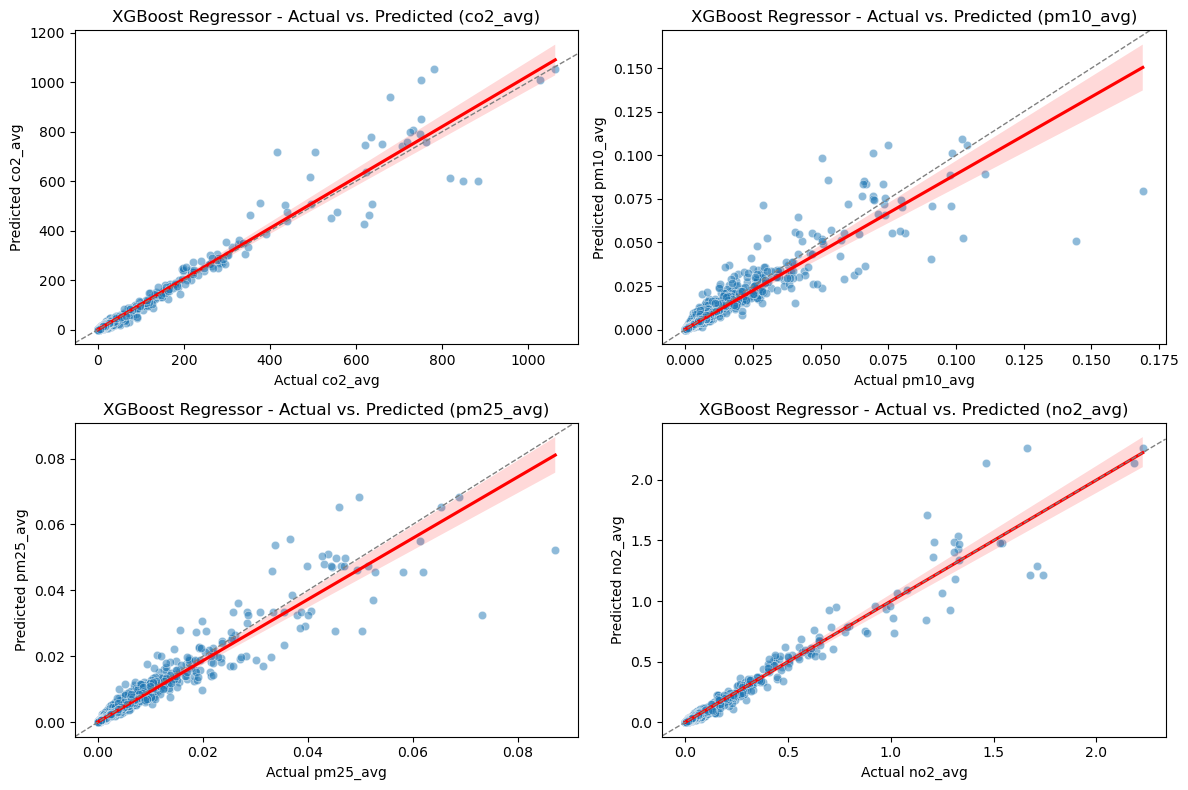

,MAE,R² Score,MSE,RMSE
co2_avg,1.052397,0.958323,5.303319e+01,7.282389
pm10_avg,0.000254,0.885536,3.375134e-06,0.001837
pm25_avg,0.000121,0.928753,6.683669e-07,0.000818
no2_avg,0.002305,0.962800,1.953587e-04,0.013977
Overall,0.263770,0.933853,1.325835e+01,3.641201


In [14]:
# Evaluate performance
eval_matrix_xgb = utils.evaluate_regressor(y_test, y_pred, model_name='XGBoost Regressor')
eval_matrix_xgb

**Comments on metrics evaluation**

_Mean Absolute Error (MAE)_

    The XGBoost model achieves low MAE values across all pollutants.
    The highest MAE is observed for CO₂ emissions, but it is still relatively low, indicating strong predictive performance.
    The very small MAE values for PM10, PM2.5, and NO₂ suggest the model is making good predictions.

_R squared (R^2)_

    The R2R2 values are all above 0.88, showing that XGBoost explains most of the variance in pollutant levels.
    NO₂ and CO₂ have the highest R2R2 (~0.96), indicating excellent predictive performance.
    PM10 and PM2.5 have slightly lower R2R2 (~0.88–0.93), which may suggest room for improvement in capturing fine particulate matter  patterns.

_Mean Squared Error (MSE)_

    The MSE values follow the same pattern as MAE, with CO₂ emissions showing the highest value.
    Since MSE penalises larger errors more than MAE, the fact that the values are relatively low suggests some deviations from actual values.

_Root Mean Squared Error (RMSE)_

    RMSE values remain small, reinforcing the idea that XGBoost is performing well.
    CO₂ predictions exhibit a higher RMSE than other pollutants, indicating some variability in predictions.
    Despite this, XGBoost still maintains better performance compared to Ridge regression and Random Forest in most cases.

In [15]:
# save the xgboost model 
utils.save_model(xgb, './checkpoints/xgboost_regressor.pkl', scaler_X, target_columns=y.columns)

# load the xgboost model
(xgb, scaler_X, _, target_columns) = utils.load_model('./checkpoints/xgboost_regressor.pkl')

Model and additional data saved to ./checkpoints/xgboost_regressor.pkl
Model loaded from ./checkpoints/xgboost_regressor.pkl


In [16]:
# Compare some predictions and related actual values
xgb_predictions = utils.compare_predictions(y_test, y_pred, model_name='XGBoost Regressor')
xgb_predictions


=== XGBoost Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,11.485949,11.102096,0.000760,0.000759,0.000969,0.000985,0.041334,0.046622
1,3.611230,3.938681,0.000000,0.000015,0.000004,0.000020,0.005565,0.005535
2,0.109866,0.124412,0.000224,0.000252,0.000786,0.000767,0.015943,0.018107
3,22.777578,27.277685,0.003592,0.003918,0.000125,0.000148,0.032443,0.037330
4,0.727269,0.757466,0.002765,0.002462,0.000273,0.000235,0.014472,0.016634


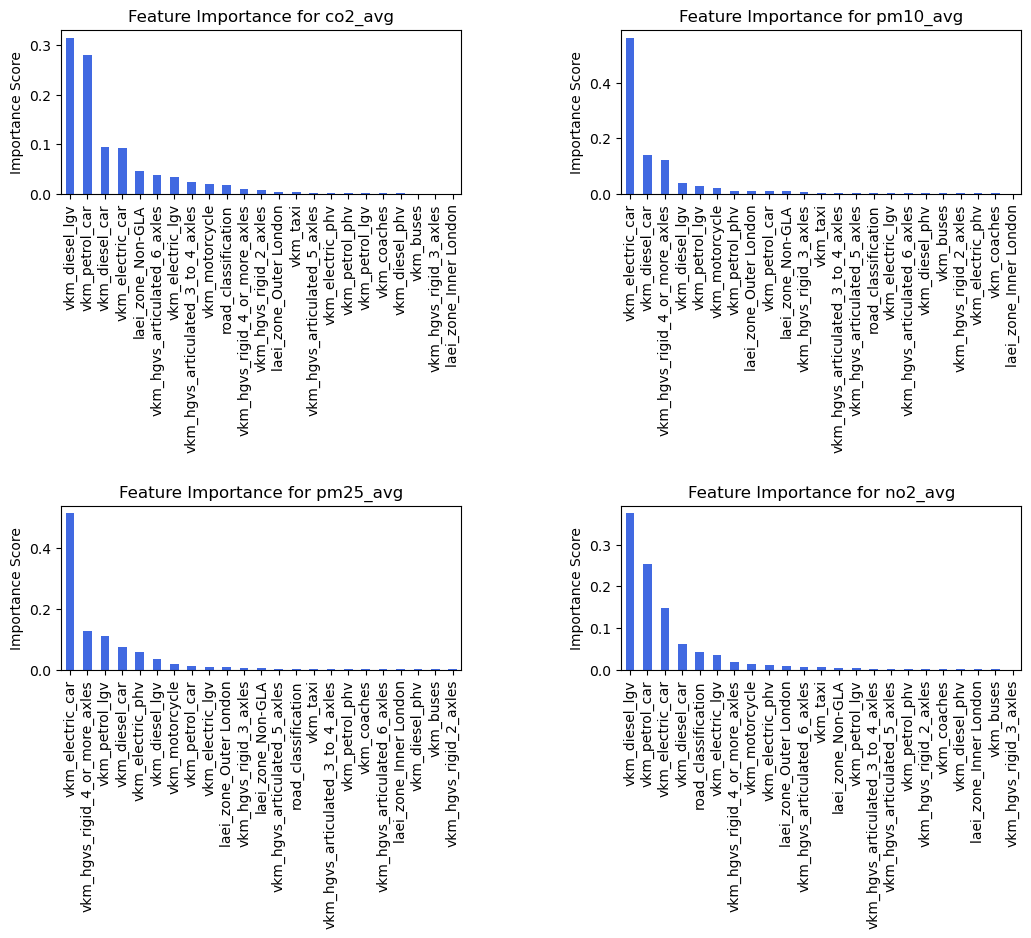

In [17]:
# Feature importance from RF model (sum importance across both targets)
utils.plot_feature_importance(xgb.estimators_, X, y)

**Feature Importance Insights**

Diesel vehicles & HGVs contribute significantly to CO₂ and NO₂ emissions.

Petrol cars and motorcycles influence PM10 and PM2.5 more.

Unexpectedly, electric cars seem to be the most essential feature in PM10 and PM25 emissions. CO2 and NO2 emissions are also being affected by Electrics cars


**Overall Interpretation**

✅ Good Performance:

    XGBoost maintains high accuracy with low error values.

⚠️ Potential Areas for Improvement:

    Hyperparameter tuning is crucial to avoid overfitting.
    Feature engineering (removing outliers, for example) might further improve efficiency.
    Interpretability: Unlike Ridge regression, XGBoost models can be harder to interpret, however feature importance plots helped to have some insights.

<hr style="border: 2px solid blue;">

### Step 2.2.2: Random Forest Multioutput Regressor

In [19]:
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_features=0.5, random_state=42, n_jobs=-1))
rf_model.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_features=0.5,
                                                     n_jobs=-1,
                                                     random_state=42))

In [20]:
y_pred_rf = rf_model.predict(X_test_scaled)


=== Random Forest Regressor Evaluation Metrics ===


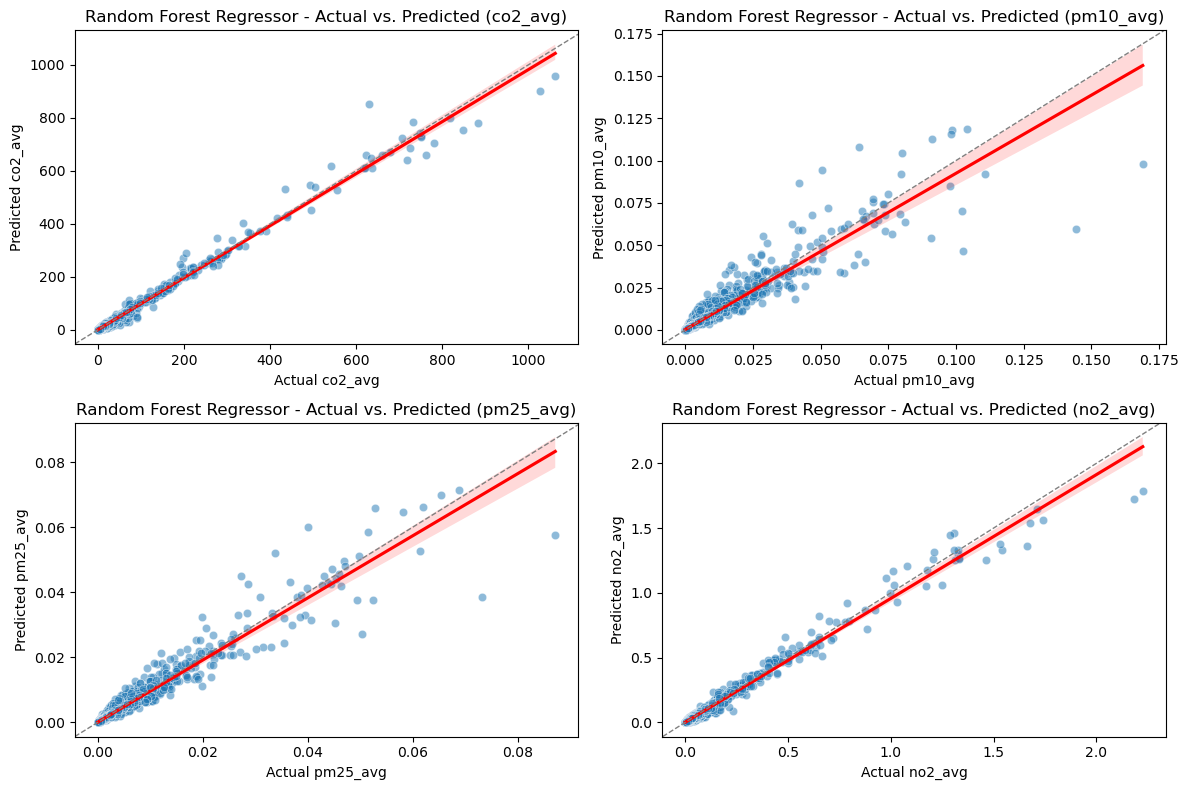

,MAE,R² Score,MSE,RMSE
co2_avg,0.889165,0.987993,1.527825e+01,3.908740
pm10_avg,0.000243,0.899566,2.961427e-06,0.001721
pm25_avg,0.000107,0.944726,5.185249e-07,0.000720
no2_avg,0.002096,0.982710,9.080187e-05,0.009529
Overall,0.222903,0.953749,3.819586e+00,1.954376


In [21]:
# Evaluate performance
eval_matrix_rf = utils.evaluate_regressor(y_test, y_pred_rf, model_name='Random Forest Regressor')
eval_matrix_rf

**Comments on metrics evaluation**

_Mean Absolute Error (MAE)_

    CO₂_avg: 0.889 → Shows good accuracy, slightly better than XGBoost.
    PM10_avg: 0.000243 and PM25_avg: 0.000107 → Very small errors, indicating good predictions.
    NO₂_avg: 0.002096 → Still very low, suggesting minimal deviation in predictions.
    Overall MAE: 0.2229, meaning the model makes small absolute errors across all pollutants.

_R squared (R^2)_

    CO₂_avg: 0.988 → Extremely high, meaning the model captures nearly all CO₂ variance.
    PM10_avg: 0.899, PM25_avg: 0.945, NO₂_avg: 0.983 → All values are above 0.89, showing strong predictive power.
    Overall R²: 0.9537, meaning the model explains 95.37% of the variance in pollutant levels.

_Mean Squared Error (MSE)_

    CO₂_avg: 15.27 → Indicates some variation but is still lower than XGBoost.
    PM10_avg: 2.96e-06 and PM25_avg: 5.18e-07 → Tiny errors, showing good precision.
    NO₂_avg: 9.08e-05 → Small value, reinforcing accuracy.
    Overall MSE: 3.8195, meaning low overall error.

_Root Mean Squared Error (RMSE)_

    CO₂_avg: 3.90 → Acceptable but slightly higher. However, it is lower than XGBoost.
    PM10_avg: 0.0017 and PM25_avg: 0.0007 → Very small errors, proving high accuracy.
    NO₂_avg: 0.0095 → Still low, reinforcing strong predictive ability.
    Overall RMSE: 1.95, indicating good overall accuracy.

In [22]:
# save the random forest model 
utils.save_model(rf_model, './checkpoints/random_forest_regressor.pkl', scaler_X, target_columns=y.columns)

# load the random forest model
(rf_model, scaler_X, _, target_columns) = utils.load_model('./checkpoints/random_forest_regressor.pkl')

Model and additional data saved to ./checkpoints/random_forest_regressor.pkl
Model loaded from ./checkpoints/random_forest_regressor.pkl


In [23]:
# Compare some predictions and related actual values
rf_predictions = utils.compare_predictions(y_test, y_pred, model_name='Random Forest Regressor')
rf_predictions


=== Random Forest Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,1.405920,1.200747,0.000242,0.000245,0.000103,0.000138,0.019011,0.022846
1,5.345388,7.047954,0.000489,0.000499,0.000338,0.000310,0.997611,0.960153
2,8.093837,7.500006,0.005866,0.005543,0.000197,0.000205,0.001563,0.001387
3,3.347917,3.437179,0.000965,0.000897,0.001081,0.001111,0.000926,0.000906
4,15.759243,15.261973,0.001736,0.001748,0.000154,0.000155,0.003820,0.004399


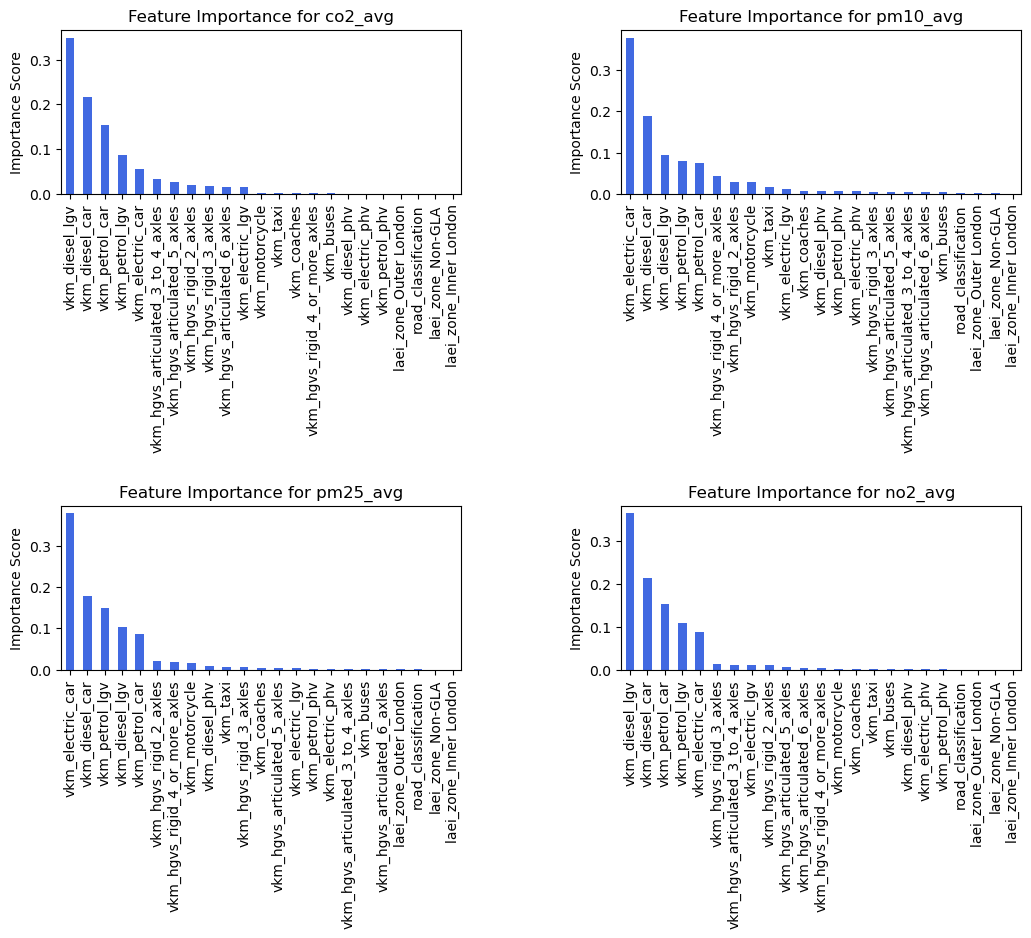

In [24]:
utils.plot_feature_importance(rf_model.estimators_, X, y)

**Feature Importance Insights**

Diesel & Petrol vehicles are the strongest predictors for CO₂ and NO₂ emissions. Electric cars have a minimal contribution, confirming their lower emissions.

Strangely, electric cars seem to be the most important feature for PM10, followed by Diesels and HGVS.

Also, Electric cars seem to be the most important features for PM25, followed by HGVS and petrol.


**Overall Interpretation**

✅ Good Performance:

    Random Forest maintains high accuracy with low error values. The values appear to be slightly more accurate than the XGBoost values. But it still has some high values with MSE and RMSE

⚠️ Potential Areas for Improvement:

    Hyperparameter tuning could help enhance the model and avoid overfitting.
    Feature engineering could also help to improve efficiency.
    Interpretability: Like XGBoost, Random models can be harder to interpret. And here as well, feature importance demonstrates its value in assisting with that.

<hr style="border: 2px solid blue;">

### Step 2.2.3: Ridge Multi-Output Regressor

In [26]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [27]:
# Predict emissions for each target variable
y_pred_ridge = ridge_model.predict(X_test_scaled)


=== Ridge Regressor Evaluation Metrics ===


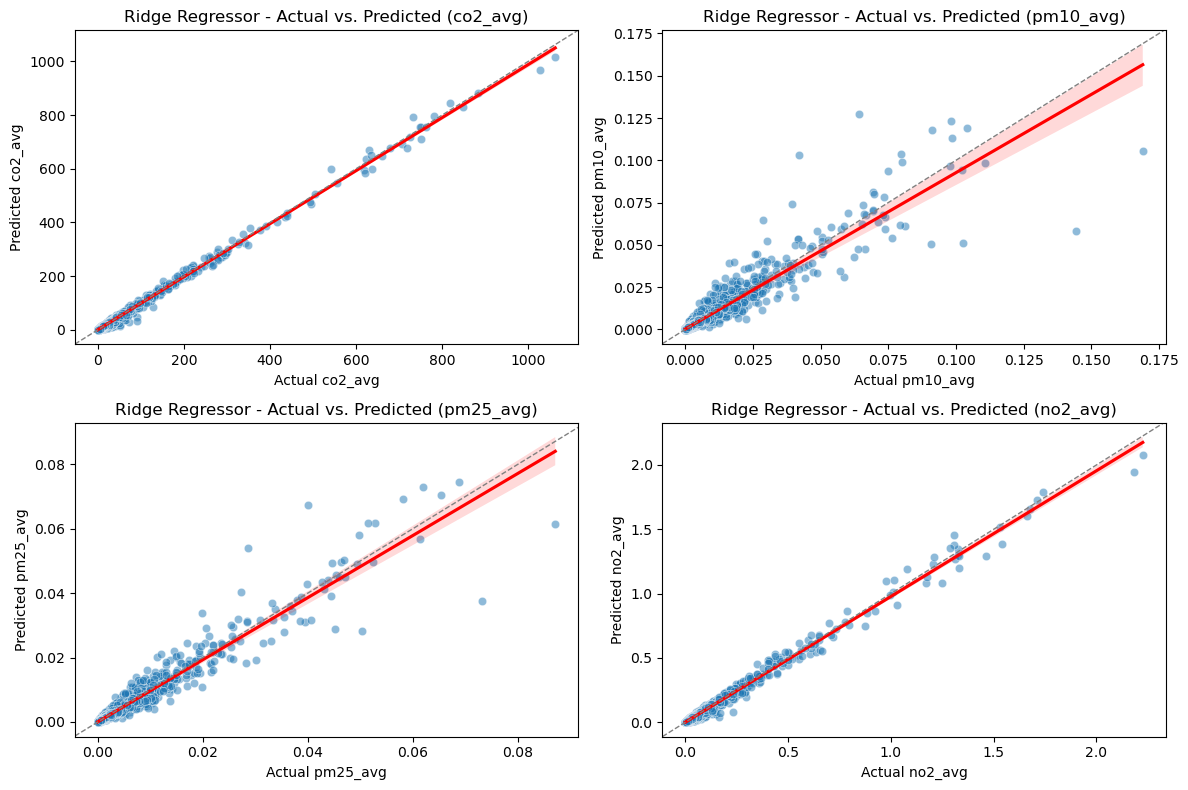

,MAE,R² Score,MSE,RMSE
co2_avg,0.971460,0.995176,6.137784e+00,2.477455
pm10_avg,0.000427,0.888105,3.299370e-06,0.001816
pm25_avg,0.000187,0.939058,5.716951e-07,0.000756
no2_avg,0.002440,0.990052,5.224498e-05,0.007228
Overall,0.243629,0.953098,1.534460e+00,1.238733


In [28]:
# Evaluate performance
eval_matrix_ridge = utils.evaluate_regressor(y_test, y_pred_ridge, model_name='Ridge Regressor')
eval_matrix_ridge

In [29]:
# Compare some predictions and related actual values
ridge_predictions = utils.compare_predictions(y_test, y_pred_ridge, model_name='Ridge Regressor')
ridge_predictions


=== Ridge Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,2.238162,2.333292,0.013144,0.014734,0.000193,0.000279,0.028720,0.023663
1,0.243787,0.795765,0.000239,0.000280,0.000633,0.000528,0.624752,0.602503
2,0.981508,1.460332,0.000053,0.000146,0.000030,0.000136,0.035983,0.013994
3,0.323816,1.031505,0.012293,0.009340,0.000068,0.000165,0.004941,0.005808
4,0.073590,0.341792,0.000138,0.000214,0.000077,0.000167,0.003029,0.003660


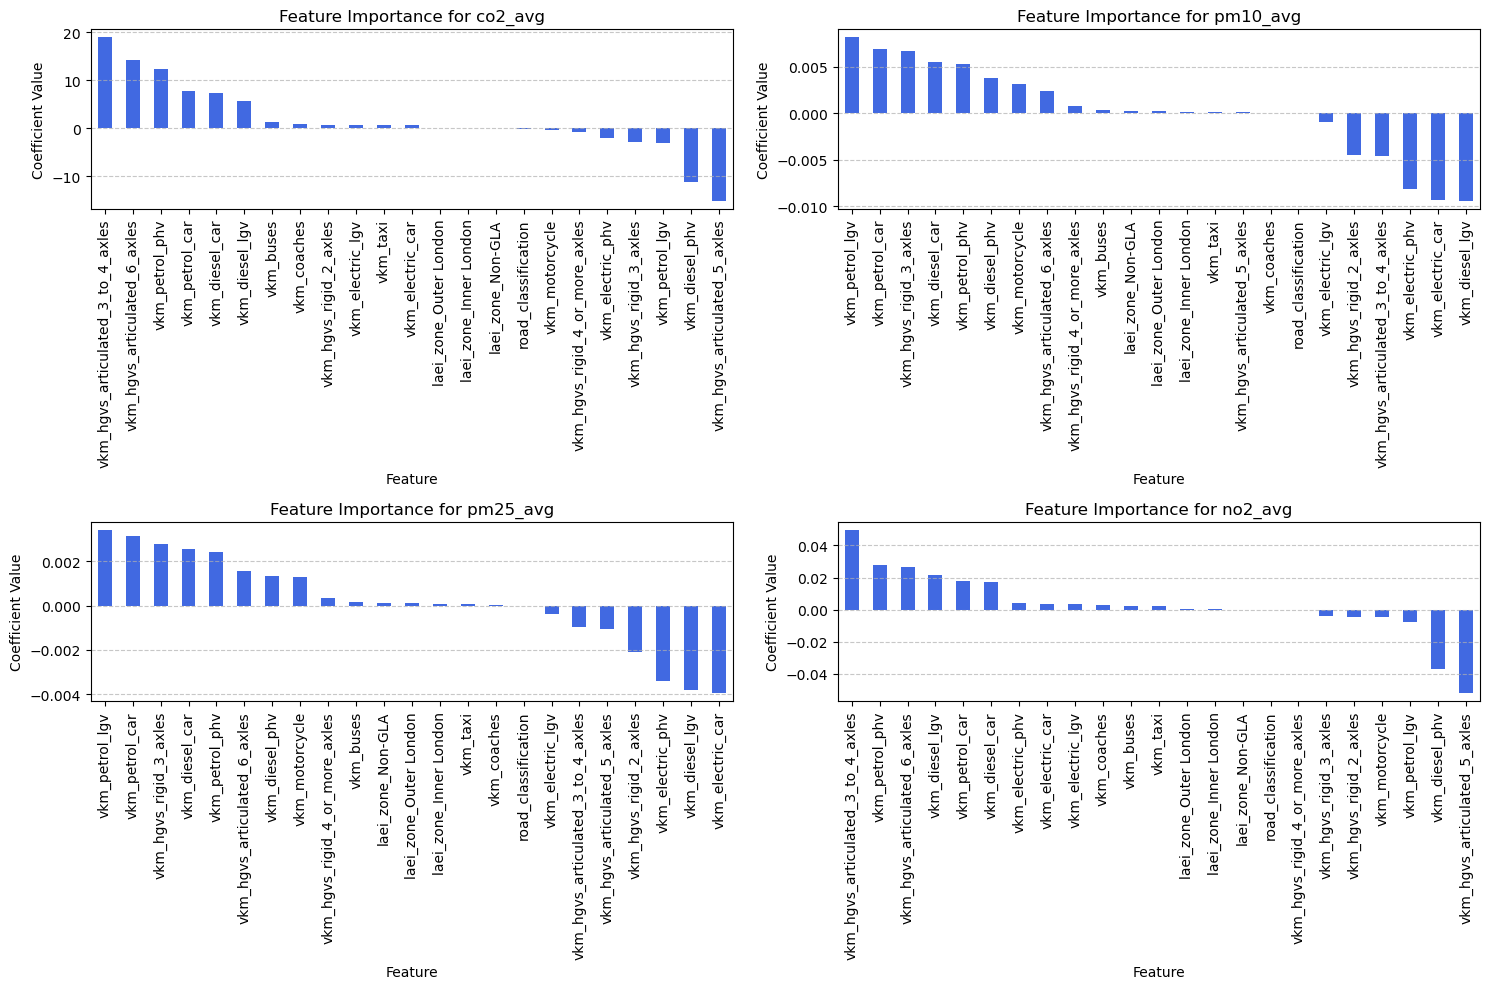

In [30]:
# plot feature importance for ridge model
utils.plot_ridge_feature_importance(ridge_model, X, y.columns)

<hr style="border: 2px solid blue;">

### Step 2.2.4: Multi-layer Perceptron Multi-Output Regressor

In [32]:
# Scale training data and store the scaler
X_train_scaled, y_train_scaled, scaler_X, scaler_y = utils.scale_data(X_train, y_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
#X_test_scaled, y_test_scaled, _, _ = utils.scale_data(X_test, y_test, scaler_X=scaler_X, scaler_Y=scaler_y, fit_scaler=False)

mlp_pipeline = Pipeline([
        ('scaler', scaler_X),
        ('mlp', MLPRegressor(max_iter=500, random_state=42))
    ])


mlp_pipeline.fit(X_train_scaled, y_train)

# Wrap the pipeline with TransformedTargetRegressor to scale the target values.
# This ensures that during prediction, the outputs are automatically inverse transformed
# back to the original (unnormalized) space.
mlp_model = TransformedTargetRegressor(regressor=mlp_pipeline, transformer=scaler_y)

#mlp_model.fit(X_train_scaled, y_train_scaled)
mlp_model.fit(X_train_scaled, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('mlp',
                                                      MLPRegressor(max_iter=500,
                                                                   random_state=42))]),
                           transformer=StandardScaler())

In [33]:
# Predict emissions for each target variable
y_pred_mlp = mlp_model.predict(X_test_scaled)

# transform back to unstandardized values
#y_pred = scaler_y.inverse_transform(y_pred)


=== MLP Regressor Evaluation Metrics ===


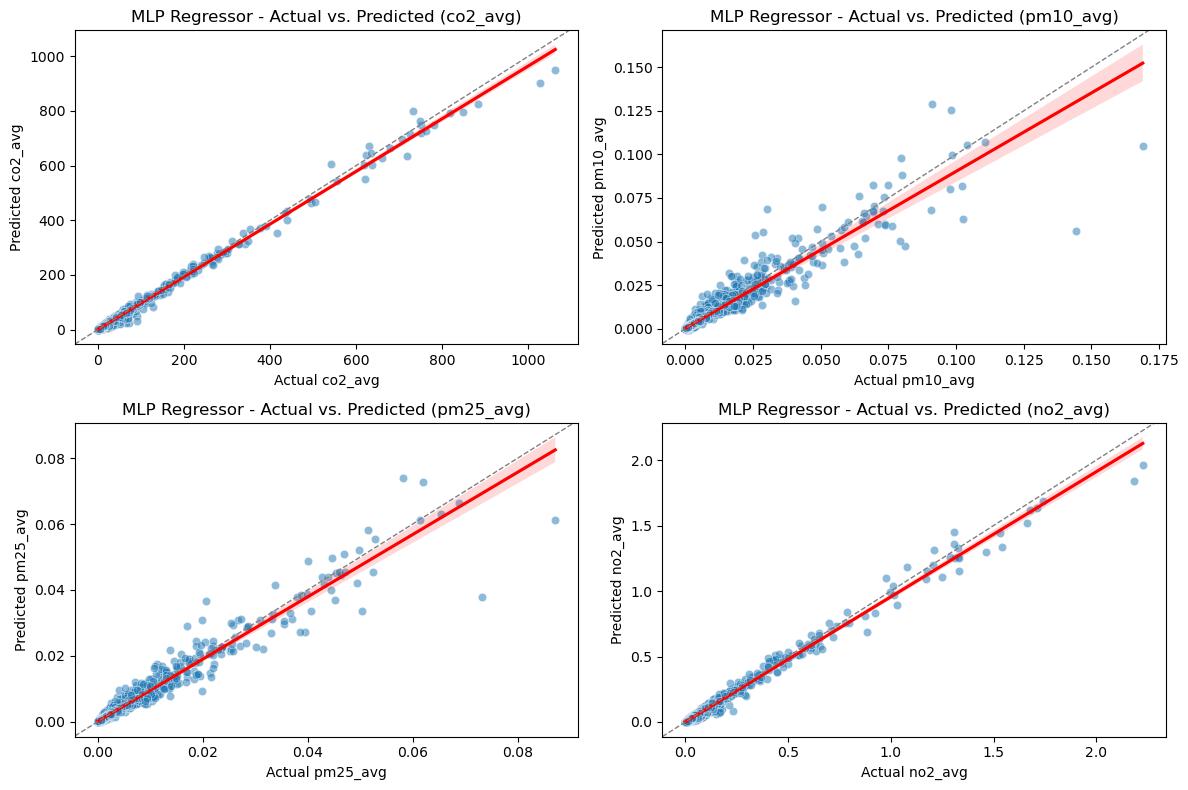

,MAE,R² Score,MSE,RMSE
co2_avg,0.912191,0.992833,9.119757e+00,3.019893
pm10_avg,0.000301,0.917764,2.424854e-06,0.001557
pm25_avg,0.000130,0.956341,4.095700e-07,0.000640
no2_avg,0.002154,0.988505,6.036731e-05,0.007770
Overall,0.228694,0.963861,2.279955e+00,1.509952


In [34]:
# Evaluate performance
eval_matrix_mlp = utils.evaluate_regressor(y_test, y_pred_mlp, model_name='MLP Regressor')
eval_matrix_mlp

In [35]:
# Compare some predictions and related actual values
mlp_predictions = utils.compare_predictions(y_test, y_pred_mlp, model_name='MLP Regressor')
mlp_predictions


=== MLP Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,2.153520,2.910569,0.000856,0.000950,0.000636,0.000654,0.002475,0.002551
1,11.694266,11.842271,0.006461,0.006554,0.000406,0.000435,0.000447,0.001090
2,5.690895,5.362397,0.000023,0.000125,0.001942,0.001946,0.052663,0.056398
3,2.201512,2.423300,0.000003,0.000128,0.000197,0.000193,0.003800,0.002934
4,6.134675,5.714119,0.005730,0.005257,0.001276,0.001447,0.005897,0.007169


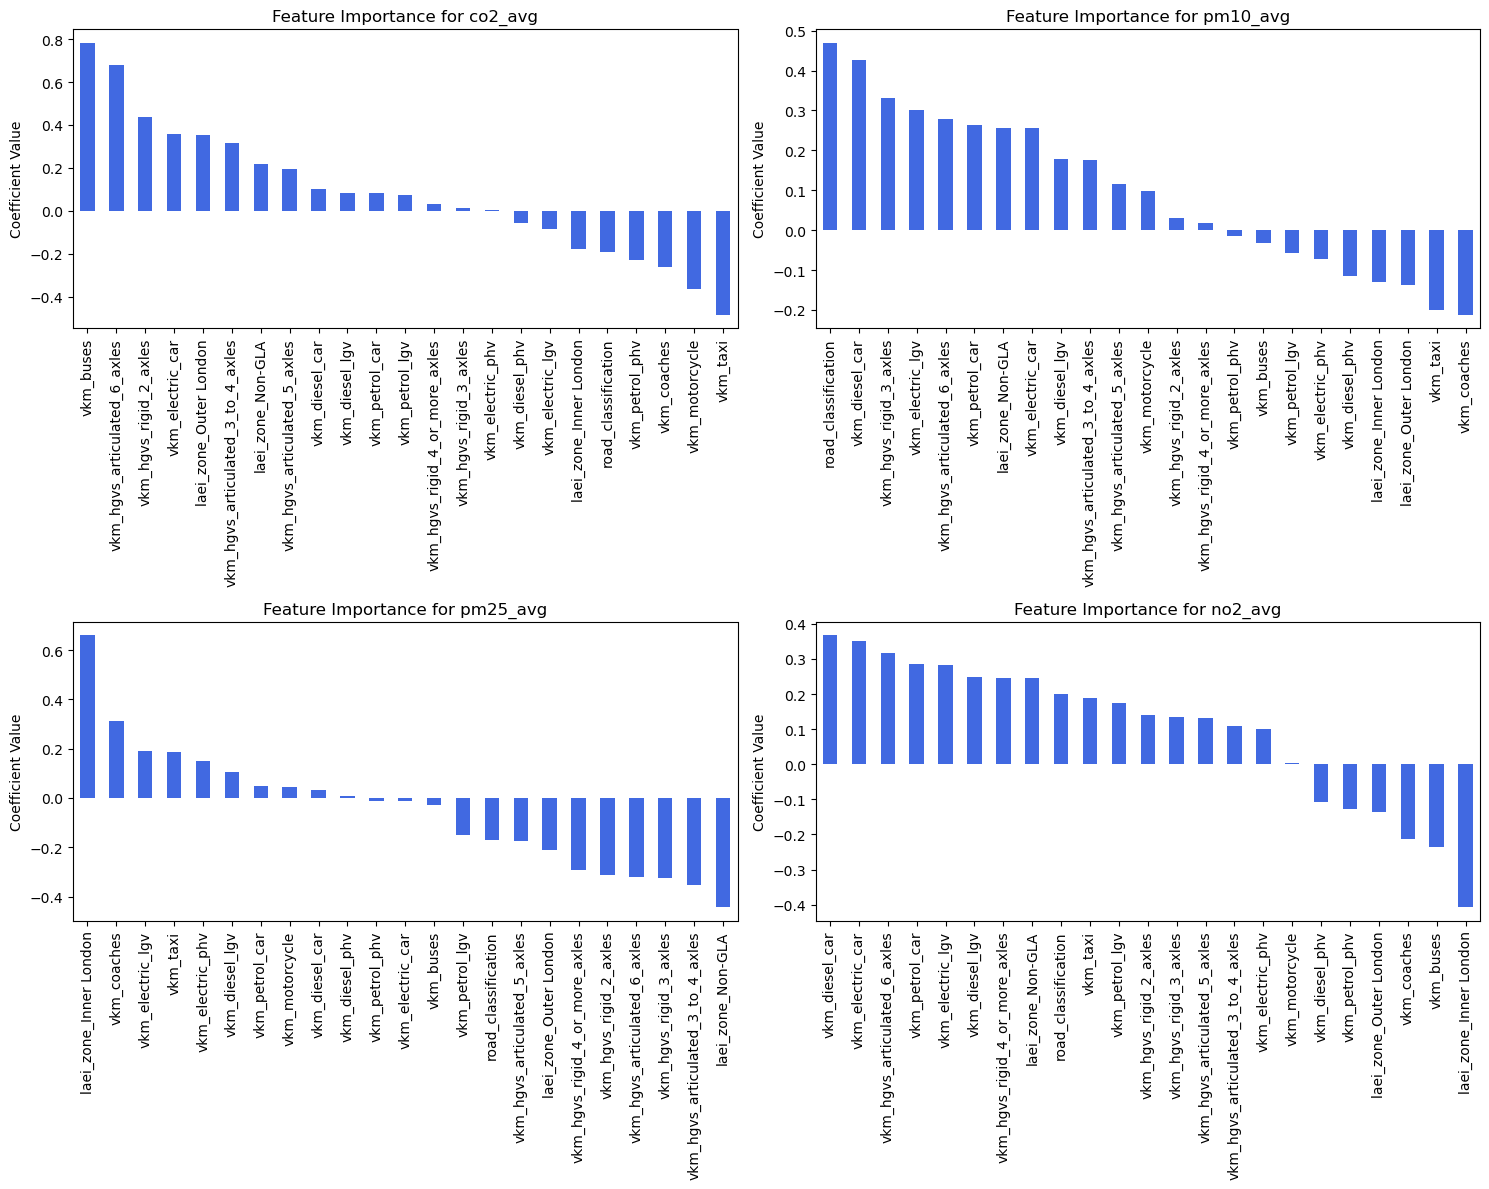

,co2_avg,pm10_avg,pm25_avg,no2_avg
road_classification,-0.191161,0.469279,-0.169381,0.201399
vkm_motorcycle,-0.363591,0.098230,0.042534,0.004174
vkm_taxi,-0.484329,-0.198808,0.187823,0.187634
vkm_petrol_car,0.080689,0.263144,0.047512,0.284386
vkm_diesel_car,0.102767,0.426429,0.032386,0.367054
vkm_electric_car,0.355712,0.255228,-0.013118,0.350526
vkm_petrol_phv,-0.231603,-0.014257,-0.013043,-0.126906
vkm_diesel_phv,-0.058358,-0.113808,0.007870,-0.106813
vkm_electric_phv,0.004912,-0.072809,0.148136,0.099999
vkm_petrol_lgv,0.075241,-0.058009,-0.149148,0.173794


In [36]:
utils.plot_mlp_feature_importance(mlp_pipeline, X, y)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 2.3: Models tuning

In [38]:
final_merged_df_without_outliers = utils.remove_outliers_iqr('./preprocessed_data/final_dataset.csv', ['co2_avg', 'pm10_avg', 'pm25_avg', 'no2_avg'])

Shape before removing outliers: (79388, 27)
Removed 8531 (10.75 %) outliers from ['co2_avg', 'pm10_avg', 'pm25_avg', 'no2_avg']
Shape after removing outliers: (70857, 27)


In [39]:
# save features list in a csv file
final_merged_df_without_outliers.to_csv('./preprocessed_data/final_without_outliers.csv', index=False)

In [40]:
X, y = utils.load_data('./preprocessed_data/final_without_outliers.csv', 
                       ['co2_avg', 'pm10_avg', 'pm25_avg', 'no2_avg'])

In [41]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale training data and store the scaler
X_train_scaled, _, scaler_X, _ = utils.scale_data(X_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
X_test_scaled, _, _, _ = utils.scale_data(X_test, scaler_X=scaler_X, fit_scaler=False)

<hr style="border: 2px solid blue;">

### Step 2.3.1: XGBoost Model After Hyperparameters Tuning (GridSearchCV) 

In [43]:
param_grid_xgb = {
    "estimator__n_estimators": [100, 200, 300],
    "estimator__learning_rate": [0.01, 0.1, 0.2],
    "estimator__max_depth": [3, 5, 7]
}

ridge_results, eval_matrix_best_xgb = utils.smart_grid_search(xgb, "XGBoost Regressor", param_grid_xgb, X_train_scaled, y_train, X_test_scaled, y_test, cv_splits=5)


🔍 Running Grid Search for XGBoost Regressor...


✅ Best Parameters for XGBoost Regressor: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 7, 'estimator__n_estimators': 100}
📊 Metrics evaluations of the Best Parameters:

               MAE  R² Score           MSE      RMSE
co2_avg   0.403638  0.928341  5.263666e-01  0.725511
pm10_avg  0.000052  0.981814  1.405377e-08  0.000119
pm25_avg  0.000029  0.981809  3.437891e-09  0.000059
no2_avg   0.000903  0.938219  2.456948e-06  0.001567
Overall   0.101155  0.957546  1.315923e-01  0.362756
💾 Model saved: ./checkpoints/XGBoost Regressor_best_model.pkl


In [44]:
utils.display_side_by_side(eval_matrix_xgb, eval_matrix_best_xgb)

,MAE,R² Score,MSE,RMSE
co2_avg,1.052397,0.958323,5.303319e+01,7.282389
pm10_avg,0.000254,0.885536,3.375134e-06,0.001837
pm25_avg,0.000121,0.928753,6.683669e-07,0.000818
no2_avg,0.002305,0.962800,1.953587e-04,0.013977
Overall,0.263770,0.933853,1.325835e+01,3.641201
,MAE,R² Score,MSE,RMSE
co2_avg,0.403638,0.928341,5.263666e-01,0.725511
pm10_avg,0.000052,0.981814,1.405377e-08,0.000119
pm25_avg,0.000029,0.981809,3.437891e-09,0.000059
no2_avg,0.000903,0.938219,2.456948e-06,0.001567


<hr style="border: 2px solid blue;">

### Step 2.3.2: Random Forest Model After Hyperparameters Tuning (Random GridSearchCV) 

In [46]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

rf_results, eval_matrix_best_rf = utils.smart_grid_search_advanced(
    rf_model, "RandomForest", param_grid_rf, X_train_scaled, y_train, X_test_scaled, y_test, 
    cv_splits=5, use_random_search=True)


🔍 Running Randomized Search for RandomForest...



/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



✅ Best Parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}

📊 Metrics evaluations of the Best Parameters:

               MAE  R² Score           MSE      RMSE
co2_avg   0.404322  0.927034  5.359687e-01  0.732099
pm10_avg  0.000051  0.980048  1.541848e-08  0.000124
pm25_avg  0.000026  0.982365  3.332864e-09  0.000058
no2_avg   0.000896  0.936160  2.538797e-06  0.001593
Overall   0.101324  0.956402  1.339928e-01  0.366050
💾 Model saved: ./checkpoints/RandomForest_best_model.pkl


In [47]:
utils.display_side_by_side(eval_matrix_rf, eval_matrix_best_rf)

,MAE,R² Score,MSE,RMSE
co2_avg,0.889165,0.987993,1.527825e+01,3.908740
pm10_avg,0.000243,0.899566,2.961427e-06,0.001721
pm25_avg,0.000107,0.944726,5.185249e-07,0.000720
no2_avg,0.002096,0.982710,9.080187e-05,0.009529
Overall,0.222903,0.953749,3.819586e+00,1.954376
,MAE,R² Score,MSE,RMSE
co2_avg,0.404322,0.927034,5.359687e-01,0.732099
pm10_avg,0.000051,0.980048,1.541848e-08,0.000124
pm25_avg,0.000026,0.982365,3.332864e-09,0.000058
no2_avg,0.000896,0.936160,2.538797e-06,0.001593


<hr style="border: 2px solid blue;">

### Step 2.3.3: Ridge Model After Hyperparameters Tuning (GridSearchCV) 

In [49]:
param_grid_ridge = {"alpha": [0.01, 0.1, 1, 10, 100]}

ridge_results, eval_matrix_best_ridge = utils.smart_grid_search(
    ridge_model, "Ridge", param_grid_ridge, X_train_scaled, y_train, X_test_scaled, y_test, cv_splits=5
)


🔍 Running Grid Search for Ridge...


✅ Best Parameters for Ridge: {'alpha': 0.01}
📊 Metrics evaluations of the Best Parameters:

               MAE  R² Score           MSE      RMSE
co2_avg   0.450333  0.918717  5.970578e-01  0.772695
pm10_avg  0.000058  0.975774  1.872102e-08  0.000137
pm25_avg  0.000029  0.979051  3.959308e-09  0.000063
no2_avg   0.001016  0.927988  2.863817e-06  0.001692
Overall   0.112859  0.950382  1.492652e-01  0.386349
💾 Model saved: ./checkpoints/Ridge_best_model.pkl


In [50]:
utils.display_side_by_side(eval_matrix_ridge, eval_matrix_best_ridge)

,MAE,R² Score,MSE,RMSE
co2_avg,0.971460,0.995176,6.137784e+00,2.477455
pm10_avg,0.000427,0.888105,3.299370e-06,0.001816
pm25_avg,0.000187,0.939058,5.716951e-07,0.000756
no2_avg,0.002440,0.990052,5.224498e-05,0.007228
Overall,0.243629,0.953098,1.534460e+00,1.238733
,MAE,R² Score,MSE,RMSE
co2_avg,0.450333,0.918717,5.970578e-01,0.772695
pm10_avg,0.000058,0.975774,1.872102e-08,0.000137
pm25_avg,0.000029,0.979051,3.959308e-09,0.000063
no2_avg,0.001016,0.927988,2.863817e-06,0.001692


<hr style="border: 2px solid blue;">

### Step 2.3.4: MLP Model After Hyperparameters Tuning (Random GridSearchCV) 

In [52]:
mlp_tuned_model = MLPRegressor(max_iter=500, random_state=42)

param_grid_mlp = {
    "regressor__mlp__hidden_layer_sizes": [(64, 128), (128, 256), (128, 256, 128)],
    "regressor__mlp__activation": ["relu", "tanh"],
    "regressor__mlp__solver": ["adam", "lbfgs"],
    "regressor__mlp__learning_rate_init": [0.001, 0.01]
}

# Scale training data and store the scaler
X_train_scaled, y_train_scaled, scaler_X, scaler_y = utils.scale_data(X_train, y_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
X_test_scaled, y_test_scaled, _, _ = utils.scale_data(X_test, y_test, scaler_X=scaler_X, scaler_Y=scaler_y, fit_scaler=False)

mlp_results, eval_matrix_best_mlp = utils.smart_grid_search_advanced(
    #mlp_tuned_model, "MLP Regressor", param_grid_mlp, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled,
    mlp_tuned_model, "MLP Regressor", param_grid_mlp, X_train_scaled, y_train, X_test_scaled, y_test, 
    cv_splits=5, apply_target_scaling=True, use_random_search=True
)



🔍 Running Randomized Search for MLP Regressor...

⚡ Applying target scaling for MLPRegressor...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 


✅ Best Parameters for MLP Regressor: {'regressor__mlp__solver': 'lbfgs', 'regressor__mlp__learning_rate_init': 0.01, 'regressor__mlp__hidden_layer_sizes': (64, 128), 'regressor__mlp__activation': 'tanh'}

📊 Metrics evaluations of the Best Parameters:

               MAE  R² Score           MSE      RMSE
co2_avg   0.396631  0.929777  5.158147e-01  0.718202
pm10_avg  0.000042  0.983272  1.292666e-08  0.000114
pm25_avg  0.000021  0.985792  2.685143e-09  0.000052
no2_avg   0.000886  0.940727  2.357195e-06  0.001535
Overall   0.099395  0.959892  1.289543e-01  0.359102
💾 Model saved: ./checkpoints/MLP Regressor_best_model.pkl


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [53]:
utils.display_side_by_side(eval_matrix_mlp, eval_matrix_best_mlp)

,MAE,R² Score,MSE,RMSE
co2_avg,0.912191,0.992833,9.119757e+00,3.019893
pm10_avg,0.000301,0.917764,2.424854e-06,0.001557
pm25_avg,0.000130,0.956341,4.095700e-07,0.000640
no2_avg,0.002154,0.988505,6.036731e-05,0.007770
Overall,0.228694,0.963861,2.279955e+00,1.509952
,MAE,R² Score,MSE,RMSE
co2_avg,0.396631,0.929777,5.158147e-01,0.718202
pm10_avg,0.000042,0.983272,1.292666e-08,0.000114
pm25_avg,0.000021,0.985792,2.685143e-09,0.000052
no2_avg,0.000886,0.940727,2.357195e-06,0.001535
